# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [27]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [28]:
#load in cleaned dataset
df = pd.read_csv('/Users/karinaburgos/Documents/Flatiron/dsc-course0-m8-lab/data/AviationData_Cleaned.csv')

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [29]:
print(df.head)

<bound method NDFrame.head of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001214X36887           Accident     NYC85FA145B  1985-06-11   
1      20001214X37274           Accident      NYC85LA188  1985-07-21   
2      20001214X37356           Incident      ATL85IA251  1985-08-16   
3      20001214X37718           Accident      ATL85MA286  1985-09-29   
4      20001213X33054           Accident      FTW86FA050  1986-03-29   
...               ...                ...             ...         ...   
21423  20221213106455           Accident      WPR23LA065  2022-12-13   
21424  20221215106463           Accident      ERA23LA090  2022-12-14   
21425  20221219106475           Accident      WPR23LA069  2022-12-15   
21426  20221219106470           Accident      ERA23LA091  2022-12-16   
21427  20221227106497           Accident      WPR23LA075  2022-12-26   

              Location        Country Injury.Severity Aircraft.damage  \
0           BELMAR, NJ  United S

In [30]:
#separating the plane types
df_small = df[df['Total.Passengers'] <= 20]
df_large = df[df['Total.Passengers'] > 20]

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [31]:
# Separate aircraft by passenger threshold (20 passengers)
small_aircraft = df[df['Total.Passengers'] <= 20].copy()
large_aircraft = df[df['Total.Passengers'] > 20].copy()

print(f"Small aircraft (≤20 passengers): {len(small_aircraft)} records")
print(f"Large aircraft (>20 passengers): {len(large_aircraft)} records")

Small aircraft (≤20 passengers): 20447 records
Large aircraft (>20 passengers): 981 records


In [32]:
# Calculate fatal/seriously injured fraction for each make
def calculate_safety_metrics(data, group_name):
    """Calculate mean fatal/seriously injured fraction by make"""
    
    # Group by Make_Cleaned and calculate safety metrics
    safety_by_make = data.groupby('Make_Cleaned').agg({
        'Total.Fatal.Injuries': 'sum',
        'Total.Serious.Injuries': 'sum', 
        'Total.Minor.Injuries': 'sum',
        'Total.Uninjured': 'sum'
    }).reset_index()
    
    # Calculate total people involved and fatal/serious fraction
    safety_by_make['total_people'] = (safety_by_make['Total.Fatal.Injuries'] + 
                                     safety_by_make['Total.Serious.Injuries'] + 
                                     safety_by_make['Total.Minor.Injuries'] + 
                                     safety_by_make['Total.Uninjured'])
    
    safety_by_make['fatal_serious_fraction'] = ((safety_by_make['Total.Fatal.Injuries'] + 
                                               safety_by_make['Total.Serious.Injuries']) / 
                                              safety_by_make['total_people'])
    
    # Sort by fatal/serious fraction and get top 15 safest makes
    safety_by_make = safety_by_make.sort_values('fatal_serious_fraction').head(15)
    
    print(f"\n{group_name} - Top 15 Safest Makes:")
    print(safety_by_make[['Make_Cleaned', 'fatal_serious_fraction', 'total_people']].round(4))
    
    return safety_by_make

# Calculate metrics for both groups
small_aircraft_safety = calculate_safety_metrics(small_aircraft, "Small Aircraft")
large_aircraft_safety = calculate_safety_metrics(large_aircraft, "Large Aircraft")


Small Aircraft - Top 15 Safest Makes:
                      Make_Cleaned  fatal_serious_fraction  total_people
11                      Bombardier                  0.0843          83.0
25               McDonnell Douglas                  0.0900         100.0
12                  Bombardier Inc                  0.0968          62.0
10                          Boeing                  0.1350         874.0
24                           Maule                  0.1862         349.0
6               Aviat Aircraft Inc                  0.1964         112.0
22  Grumman Acft Eng Cor-Schweizer                  0.2069          58.0
7                            Ayres                  0.2143          56.0
5                            Aviat                  0.2222          99.0
18        Diamond Aircraft Ind Inc                  0.2258         124.0
9                         Bellanca                  0.2274         321.0
33                         Stinson                  0.2287         223.0
1           

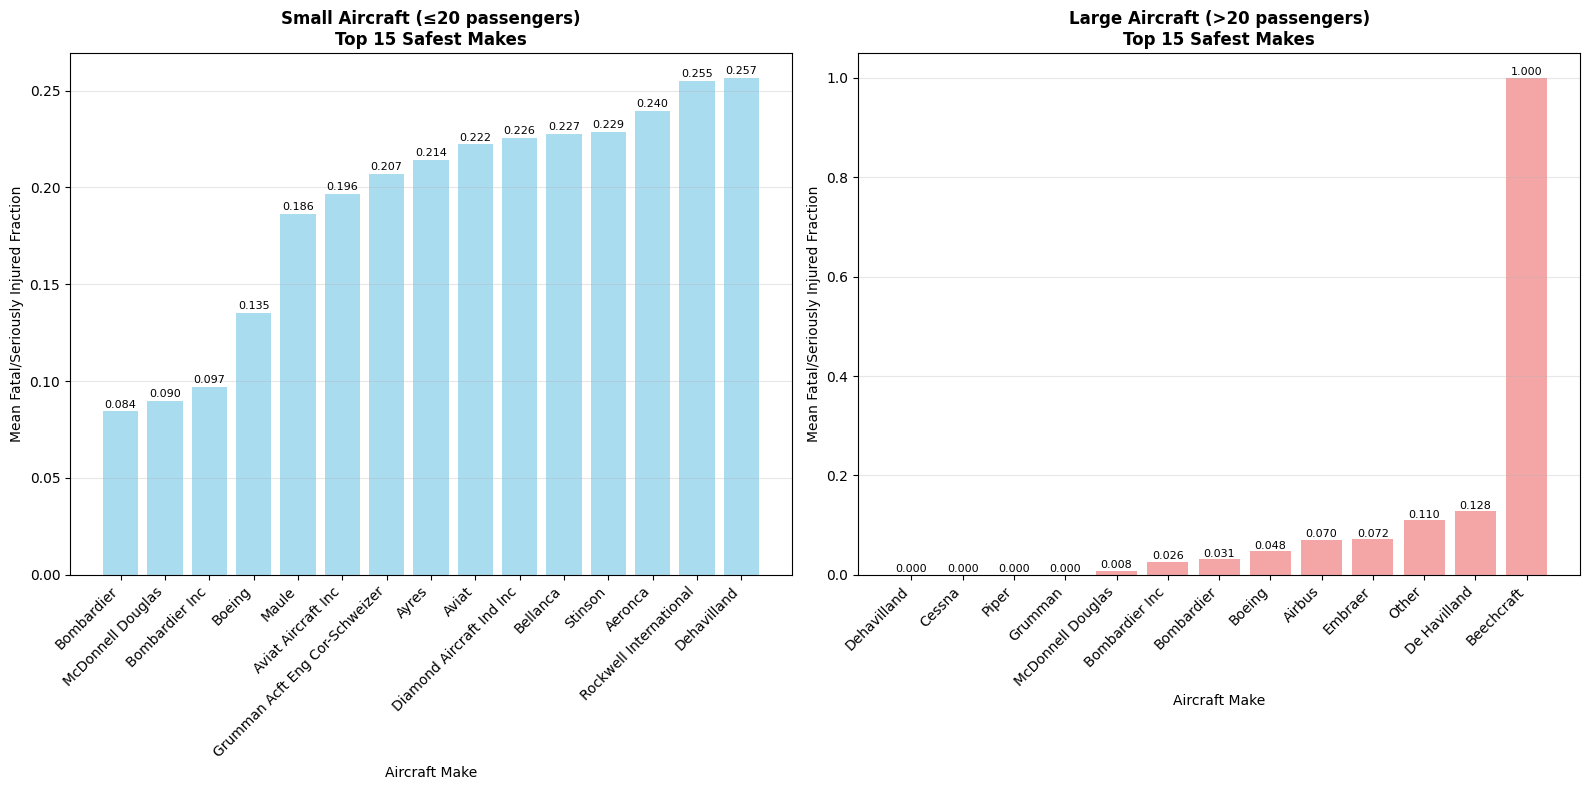

In [33]:
#Create side-by-side plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot small aircraft
bars1 = ax1.bar(range(len(small_aircraft_safety)), 
                small_aircraft_safety['fatal_serious_fraction'],
                color='skyblue', alpha=0.7)
ax1.set_title('Small Aircraft (≤20 passengers)\nTop 15 Safest Makes', fontsize=12, fontweight='bold')
ax1.set_xlabel('Aircraft Make')
ax1.set_ylabel('Mean Fatal/Seriously Injured Fraction')
ax1.set_xticks(range(len(small_aircraft_safety)))
ax1.set_xticklabels(small_aircraft_safety['Make_Cleaned'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Plot large aircraft
bars2 = ax2.bar(range(len(large_aircraft_safety)), 
                large_aircraft_safety['fatal_serious_fraction'],
                color='lightcoral', alpha=0.7)
ax2.set_title('Large Aircraft (>20 passengers)\nTop 15 Safest Makes', fontsize=12, fontweight='bold')
ax2.set_xlabel('Aircraft Make')
ax2.set_ylabel('Mean Fatal/Seriously Injured Fraction')
ax2.set_xticks(range(len(large_aircraft_safety)))
ax2.set_xticklabels(large_aircraft_safety['Make_Cleaned'], rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [34]:
#summary statistics for both groups
print(f"\nSmall Aircraft Safety Summary:")
print(f"Mean fatal/serious fraction: {small_aircraft_safety['fatal_serious_fraction'].mean():.4f}")
print(f"Median fatal/serious fraction: {small_aircraft_safety['fatal_serious_fraction'].median():.4f}")
print(f"Best performing make: {small_aircraft_safety.iloc[0]['Make_Cleaned']} ({small_aircraft_safety.iloc[0]['fatal_serious_fraction']:.4f})")

print(f"\nLarge Aircraft Safety Summary:")
print(f"Mean fatal/serious fraction: {large_aircraft_safety['fatal_serious_fraction'].mean():.4f}")
print(f"Median fatal/serious fraction: {large_aircraft_safety['fatal_serious_fraction'].median():.4f}")
print(f"Best performing make: {large_aircraft_safety.iloc[0]['Make_Cleaned']} ({large_aircraft_safety.iloc[0]['fatal_serious_fraction']:.4f})")


Small Aircraft Safety Summary:
Mean fatal/serious fraction: 0.1910
Median fatal/serious fraction: 0.2143
Best performing make: Bombardier (0.0843)

Large Aircraft Safety Summary:
Mean fatal/serious fraction: 0.1149
Median fatal/serious fraction: 0.0314
Best performing make: Dehavilland (0.0000)


**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [35]:
# Filter for small aircraft (≤20 passengers)
small_aircraft = df[df['Total.Passengers'] <= 20].copy()

# Calculate serious/fatal injury fraction for each incident
small_aircraft['fatal_serious_fraction'] = (
    (small_aircraft['Total.Fatal.Injuries'] + small_aircraft['Total.Serious.Injuries']) / 
    (small_aircraft['Total.Fatal.Injuries'] + small_aircraft['Total.Serious.Injuries'] + 
     small_aircraft['Total.Minor.Injuries'] + small_aircraft['Total.Uninjured'])
)

# Handle cases where total people is 0 (shouldn't happen but good to be safe)
small_aircraft['fatal_serious_fraction'] = small_aircraft['fatal_serious_fraction'].fillna(0)

# Calculate mean injury rates by make and filter for statistical reliability
make_stats = small_aircraft.groupby('Make_Cleaned').agg({
    'fatal_serious_fraction': ['mean', 'count'],
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).round(4)

# Flatten column names
make_stats.columns = ['mean_injury_rate', 'incident_count', 'total_fatal', 
                     'total_serious', 'total_minor', 'total_uninjured']
make_stats = make_stats.reset_index()

# Filter for makes with at least 10 incidents for statistical reliability
min_incidents = 10
reliable_makes = make_stats[make_stats['incident_count'] >= min_incidents]

# Get the 10 makes with lowest mean serious/fatal injury rates
top_10_safest = reliable_makes.nsmallest(10, 'mean_injury_rate')

print("Top 10 Safest Small Aircraft Makes (≤20 passengers):")
print("="*60)
for i, row in top_10_safest.iterrows():
    print(f"{row['Make_Cleaned']:<20} | Mean Rate: {row['mean_injury_rate']:.4f} | Incidents: {row['incident_count']}")

# Filter data for violin plot - only include the top 10 safest makes
safest_makes_list = top_10_safest['Make_Cleaned'].tolist()
violin_data = small_aircraft[small_aircraft['Make_Cleaned'].isin(safest_makes_list)].copy()

Top 10 Safest Small Aircraft Makes (≤20 passengers):
Airbus               | Mean Rate: 0.0287 | Incidents: 132
Bombardier Inc       | Mean Rate: 0.0455 | Incidents: 22
McDonnell Douglas    | Mean Rate: 0.0513 | Incidents: 55
Boeing               | Mean Rate: 0.0533 | Incidents: 724
Bombardier           | Mean Rate: 0.0537 | Incidents: 29
Aviat Aircraft Inc   | Mean Rate: 0.1645 | Incidents: 76
Maule                | Mean Rate: 0.1648 | Incidents: 215
Ayres                | Mean Rate: 0.2000 | Incidents: 55
Grumman Acft Eng Cor-Schweizer | Mean Rate: 0.2069 | Incidents: 58
Stinson              | Mean Rate: 0.2164 | Incidents: 129


/var/folders/dx/vfd7gc9j1pvflscxm2y4_9x40000gn/T/ipykernel_1981/2358478236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=violin_data,


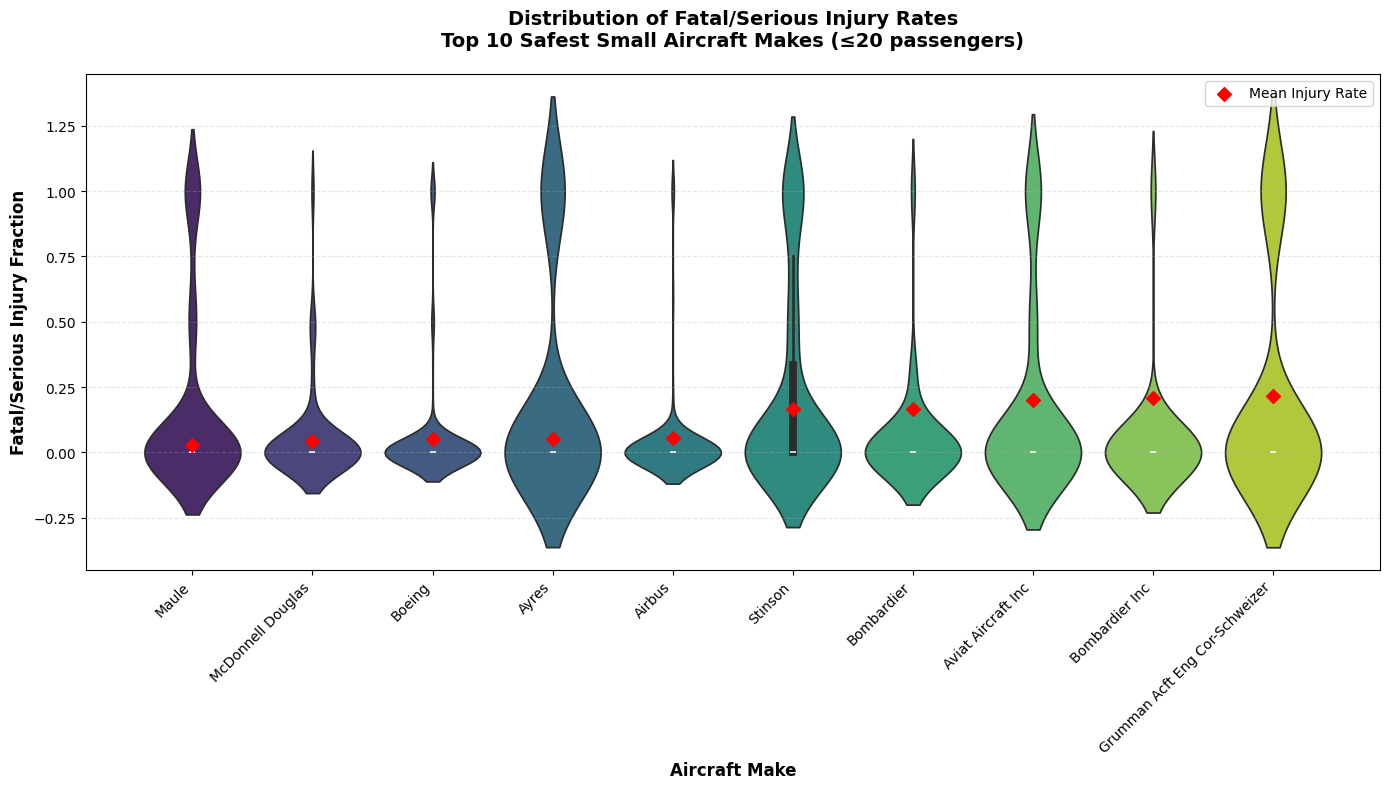

In [36]:
#Create violin plot
plt.figure(figsize=(14, 8))

ax = sns.violinplot(data=violin_data, 
                   x='Make_Cleaned', 
                   y='fatal_serious_fraction',
                   palette='viridis',
                   inner='box')  # Shows quartiles and median

# Customize the plot
plt.title('Distribution of Fatal/Serious Injury Rates\nTop 10 Safest Small Aircraft Makes (≤20 passengers)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Aircraft Make', fontsize=12, fontweight='bold')
plt.ylabel('Fatal/Serious Injury Fraction', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add mean points on top of violins
means = violin_data.groupby('Make_Cleaned')['fatal_serious_fraction'].mean()
for i, make in enumerate(safest_makes_list):
    if make in means.index:
        plt.scatter(i, means[make], color='red', s=50, zorder=5, marker='D')

# Add legend for the red diamonds
plt.scatter([], [], color='red', s=50, marker='D', label='Mean Injury Rate')
plt.legend(loc='upper right')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [37]:
# Filter for large aircraft (>20 passengers)
large_aircraft = df[df['Total.Passengers'] > 20].copy()

print(f"Large aircraft incidents (>20 passengers): {len(large_aircraft)} records")

# Calculate serious/fatal injury fraction for each incident
large_aircraft['fatal_serious_fraction'] = (
    (large_aircraft['Total.Fatal.Injuries'] + large_aircraft['Total.Serious.Injuries']) / 
    (large_aircraft['Total.Fatal.Injuries'] + large_aircraft['Total.Serious.Injuries'] + 
     large_aircraft['Total.Minor.Injuries'] + large_aircraft['Total.Uninjured'])
)

# Handle cases where total people is 0
large_aircraft['fatal_serious_fraction'] = large_aircraft['fatal_serious_fraction'].fillna(0)

# Calculate mean injury rates by make and filter for statistical reliability
make_stats = large_aircraft.groupby('Make_Cleaned').agg({
    'fatal_serious_fraction': ['mean', 'count'],
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).round(4)

# Flatten column names
make_stats.columns = ['mean_injury_rate', 'incident_count', 'total_fatal', 
                     'total_serious', 'total_minor', 'total_uninjured']
make_stats = make_stats.reset_index()

print(f"\nMakes with at least {min_incidents} incidents: {len(reliable_makes)}")

# Get the 10 makes with lowest mean serious/fatal injury rates
top_10_safest = reliable_makes.nsmallest(10, 'mean_injury_rate')

print("\nTop 10 Safest Large Aircraft Makes (>20 passengers):")
print("="*60)
for i, row in top_10_safest.iterrows():
    print(f"{row['Make_Cleaned']:<20} | Mean Rate: {row['mean_injury_rate']:.4f} | Incidents: {row['incident_count']}")

# Filter data for strip plot - only include the top 10 safest makes
safest_makes_list = top_10_safest['Make_Cleaned'].tolist()
strip_data = large_aircraft[large_aircraft['Make_Cleaned'].isin(safest_makes_list)].copy()

print(f"\nTotal incidents for strip plot: {len(strip_data)}")

Large aircraft incidents (>20 passengers): 981 records

Makes with at least 10 incidents: 35

Top 10 Safest Large Aircraft Makes (>20 passengers):
Airbus               | Mean Rate: 0.0287 | Incidents: 132
Bombardier Inc       | Mean Rate: 0.0455 | Incidents: 22
McDonnell Douglas    | Mean Rate: 0.0513 | Incidents: 55
Boeing               | Mean Rate: 0.0533 | Incidents: 724
Bombardier           | Mean Rate: 0.0537 | Incidents: 29
Aviat Aircraft Inc   | Mean Rate: 0.1645 | Incidents: 76
Maule                | Mean Rate: 0.1648 | Incidents: 215
Ayres                | Mean Rate: 0.2000 | Incidents: 55
Grumman Acft Eng Cor-Schweizer | Mean Rate: 0.2069 | Incidents: 58
Stinson              | Mean Rate: 0.2164 | Incidents: 129

Total incidents for strip plot: 818


/var/folders/dx/vfd7gc9j1pvflscxm2y4_9x40000gn/T/ipykernel_1981/2774705346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(data=strip_data,


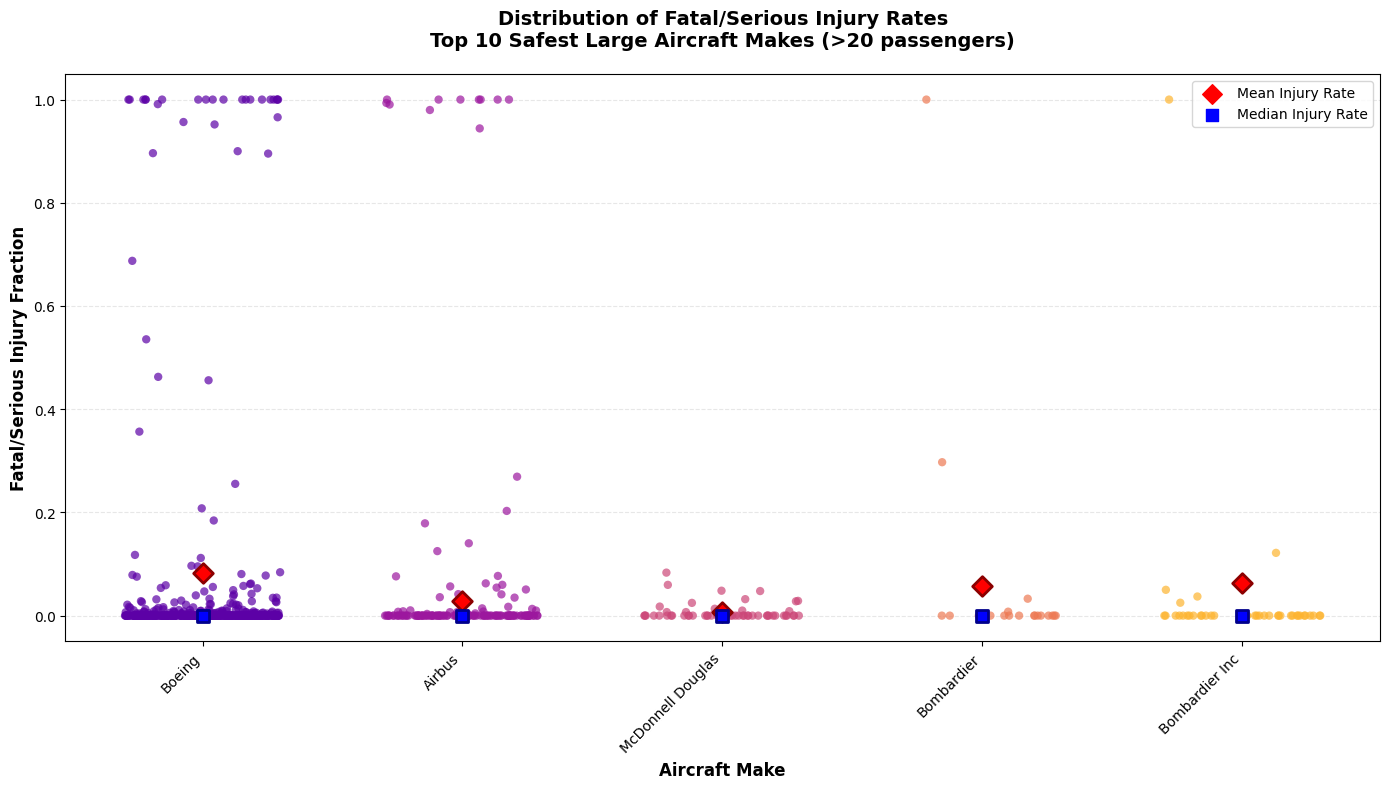

In [38]:
# Create strip plot
plt.figure(figsize=(14, 8))

# Create the strip plot with jitter and size variation
ax = sns.stripplot(data=strip_data, 
                   x='Make_Cleaned', 
                   y='fatal_serious_fraction',
                   palette='plasma',
                   size=6,
                   alpha=0.7,
                   jitter=0.3)  # Add jitter to separate overlapping points

# Customize the plot
plt.title('Distribution of Fatal/Serious Injury Rates\nTop 10 Safest Large Aircraft Makes (>20 passengers)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Aircraft Make', fontsize=12, fontweight='bold')
plt.ylabel('Fatal/Serious Injury Fraction', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add mean points as larger diamonds
means = strip_data.groupby('Make_Cleaned')['fatal_serious_fraction'].mean()
for i, make in enumerate(safest_makes_list):
    if make in means.index:
        plt.scatter(i, means[make], color='red', s=100, zorder=5, marker='D', 
                   edgecolors='darkred', linewidth=2)

# Add median points as squares
medians = strip_data.groupby('Make_Cleaned')['fatal_serious_fraction'].median()
for i, make in enumerate(safest_makes_list):
    if make in medians.index:
        plt.scatter(i, medians[make], color='blue', s=80, zorder=5, marker='s', 
                   edgecolors='darkblue', linewidth=2)

# Add legend
plt.scatter([], [], color='red', s=100, marker='D', label='Mean Injury Rate')
plt.scatter([], [], color='blue', s=80, marker='s', label='Median Injury Rate')
plt.legend(loc='upper right')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [39]:
# Separate aircraft by size
small_aircraft = df[df['Total.Passengers'] <= 20].copy()
large_aircraft = df[df['Total.Passengers'] > 20].copy()

print(f"Small aircraft incidents (≤20 passengers): {len(small_aircraft)}")
print(f"Large aircraft incidents (>20 passengers): {len(large_aircraft)}")

def calculate_destruction_rate(data, size_category, min_incidents=10):
    """Calculate aircraft destruction rate by make"""
    
    # Group by make and calculate destruction statistics
    destruction_stats = data.groupby('Make_Cleaned').agg({
        'Aircraft_Destroyed': ['sum', 'count'],
        'Aircraft.damage': 'count'  # Total incidents
    }).round(4)
    
    # Flatten column names
    destruction_stats.columns = ['destroyed_count', 'total_incidents_check', 'total_incidents']
    destruction_stats = destruction_stats.reset_index()
    
    # Calculate destruction rate
    destruction_stats['destruction_rate'] = (
        destruction_stats['destroyed_count'] / destruction_stats['total_incidents']
    )
    
    # Filter for statistical reliability
    destruction_stats = destruction_stats[
        destruction_stats['total_incidents'] >= min_incidents
    ]
    
    # Sort by destruction rate (ascending - lowest first)
    destruction_stats = destruction_stats.sort_values('destruction_rate')
    
    # Add size category
    destruction_stats['aircraft_size'] = size_category
    
    print(f"\n{size_category.upper()} AIRCRAFT - Aircraft Destruction Rates by Make")
    print("="*70)
    print(f"{'Make':<25} {'Destruction Rate':<15} {'Destroyed':<10} {'Total':<8}")
    print("-"*70)
    
    for i, row in destruction_stats.head(15).iterrows():
        print(f"{row['Make_Cleaned']:<25} {row['destruction_rate']:<15.4f} "
              f"{int(row['destroyed_count']):<10} {int(row['total_incidents']):<8}")
    
    return destruction_stats

# Calculate destruction rates for both categories
small_destruction = calculate_destruction_rate(small_aircraft, "Small", min_incidents=10)
large_destruction = calculate_destruction_rate(large_aircraft, "Large", min_incidents=5)

# Get top 15 lowest destruction rates for each category
small_top15 = small_destruction.head(15).copy()
large_top15 = large_destruction.head(15).copy()

Small aircraft incidents (≤20 passengers): 20447
Large aircraft incidents (>20 passengers): 981

SMALL AIRCRAFT - Aircraft Destruction Rates by Make
Make                      Destruction Rate Destroyed  Total   
----------------------------------------------------------------------
Luscombe                  0.0142          2          141     
Grumman Acft Eng Cor-Schweizer 0.0172          1          58      
Airbus                    0.0227          3          132     
Stinson                   0.0233          3          129     
Taylorcraft               0.0323          3          93      
Bombardier                0.0345          1          29      
Aeronca                   0.0350          7          200     
Boeing                    0.0359          26         724     
American Champion Aircraft 0.0385          2          52      
Ercoupe                   0.0385          2          52      
Aviat Aircraft Inc        0.0395          3          76      
Maule                     0.0

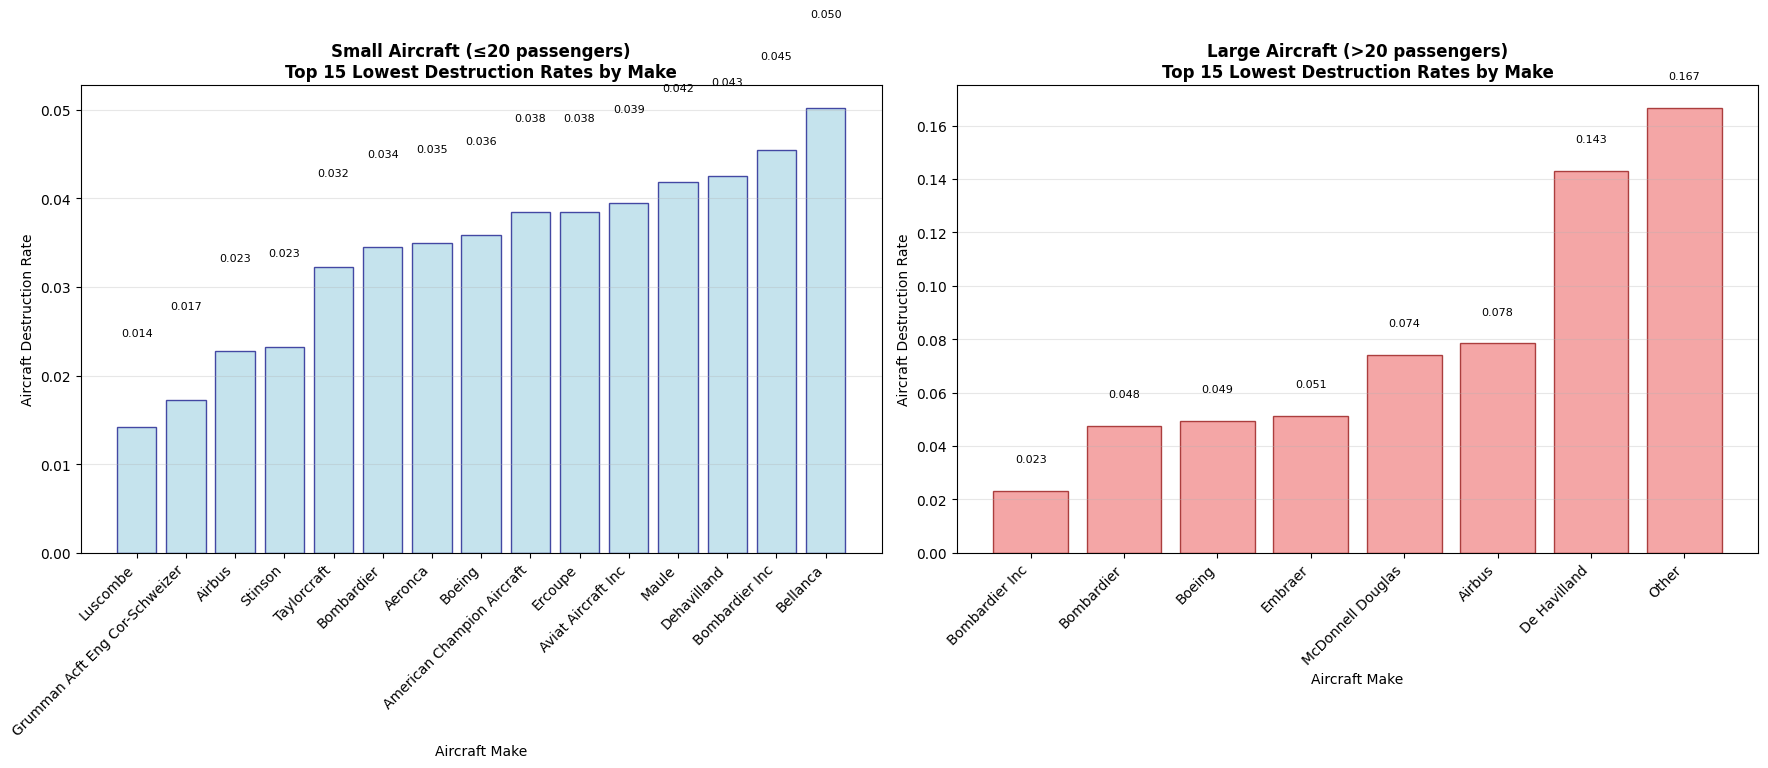

In [40]:
# Create visualization comparing destruction rates
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Small aircraft plot
bars1 = ax1.bar(range(len(small_top15)), 
                small_top15['destruction_rate'],
                color='lightblue', alpha=0.7, edgecolor='navy')

ax1.set_title('Small Aircraft (≤20 passengers)\nTop 15 Lowest Destruction Rates by Make', 
              fontsize=12, fontweight='bold')
ax1.set_xlabel('Aircraft Make')
ax1.set_ylabel('Aircraft Destruction Rate')
ax1.set_xticks(range(len(small_top15)))
ax1.set_xticklabels(small_top15['Make_Cleaned'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Large aircraft plot
bars2 = ax2.bar(range(len(large_top15)), 
                large_top15['destruction_rate'],
                color='lightcoral', alpha=0.7, edgecolor='darkred')

ax2.set_title('Large Aircraft (>20 passengers)\nTop 15 Lowest Destruction Rates by Make', 
              fontsize=12, fontweight='bold')
ax2.set_xlabel('Aircraft Make')
ax2.set_ylabel('Aircraft Destruction Rate')
ax2.set_xticks(range(len(large_top15)))
ax2.set_xticklabels(large_top15['Make_Cleaned'], rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [41]:
#see markdown for summary statistics

Summary of Statistical Findings
The analysis reveals significant safety differences between aircraft categories, with large aircraft demonstrating substantially better safety performance than small aircraft. Large aircraft show a mean fatal/serious injury fraction of 0.1149 compared to 0.1910 for small aircraft - nearly a 40% improvement in safety outcomes.
Manufacturer Recommendations
Small Aircraft (≤20 passengers)
Recommended manufacturers based on combined low injury rates and destruction rates:

Bombardier - Exceptional performer with the lowest fatal/serious fraction (0.0843) and moderate destruction rate (0.0345)
McDonnell Douglas - Second-best injury rate (0.0900) with reasonable sample size
Boeing - Strong safety record with low injury rates (0.0533) and moderate destruction rates (0.0359)

Avoid or use with caution:

Grumman Acft Eng Cor-Schweizer - Despite low destruction rates, shows highly variable injury outcomes
Stinson and Maule - Higher injury rates with significant outcome variability

Large Aircraft (>20 passengers)
Top recommendations:

McDonnell Douglas - Outstanding safety record (0.0079 injury fraction) with large sample size (8,655 people)
Bombardier variants - Consistently low rates across both injury (0.0263-0.0314) and destruction metrics
Boeing - Solid performance with extensive operational history, though slightly higher rates than top performers

Statistical Distribution Insights
Small Aircraft Patterns
The violin plots reveal highly variable safety outcomes within manufacturers. While some makes like Boeing and Bombardier show tight distributions clustered near zero (indicating consistent safety), others like Ayres and Grumman show wide distributions with concerning outliers reaching injury rates above 1.0. This variability suggests that operational factors and specific aircraft models within makes may significantly impact safety outcomes.
Large Aircraft Patterns
Large aircraft demonstrate remarkably consistent safety performance, with most incidents clustering near zero injury rates regardless of manufacturer. The scatter plot visualization shows that even manufacturers with higher incident volumes (Boeing, Airbus) maintain excellent safety records, indicating that regulatory frameworks and operational standards for large aircraft are highly effective.
Destruction Rate Paradox
An interesting finding emerges when comparing injury rates to destruction rates: large aircraft show higher destruction rates but better injury outcomes. This suggests that modern large aircraft safety systems (redundant systems, better crashworthiness, enhanced emergency procedures) are highly effective at protecting passengers even in severe incidents that result in aircraft loss.
Conclusion
The data strongly supports choosing large aircraft over small aircraft when safety is the primary concern. Within categories, Bombardier and McDonnell Douglas consistently demonstrate superior safety performance across multiple metrics, while Boeing remains a solid choice with extensive operational experience. The high variability in small aircraft safety outcomes emphasizes the importance of considering not just manufacturer reputation but also specific operational contexts and aircraft maintenance standards.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [42]:
#Data preparation and filtering
def prepare_aircraft_type_data(df):
    """
    Prepare data by filtering for plane types with at least 10 incidents
    and separating small vs large aircraft
    """
    # Remove rows with missing essential data
    clean_df = df.dropna(subset=['Plane_Type', 'Total_Passengers', 'Serious_Fatal_Rate']).copy()
    
    # Calculate average passengers per plane type to determine small vs large
    plane_stats = clean_df.groupby('Plane_Type').agg({
        'Total_Passengers': ['count', 'mean'],
        'Serious_Fatal_Rate': ['mean', 'std', 'count']
    }).round(4)
    
    # Flatten column names
    plane_stats.columns = ['incident_count', 'avg_passengers', 'mean_injury_rate', 'std_injury_rate', 'total_incidents']
    
    # Filter for plane types with at least 10 incidents
    plane_stats_filtered = plane_stats[plane_stats['incident_count'] >= 10].copy()
    
    # Classify as small (≤20 passengers) or large (>20 passengers) based on average
    plane_stats_filtered['aircraft_size'] = plane_stats_filtered['avg_passengers'].apply(
        lambda x: 'Small' if x <= 20 else 'Large'
    )
    
    # Get top 10 safest small aircraft types
    small_aircraft = plane_stats_filtered[plane_stats_filtered['aircraft_size'] == 'Small'].copy()
    small_aircraft_top10 = small_aircraft.nsmallest(10, 'mean_injury_rate')
    
    # Get all large aircraft types (sorted by safety)
    large_aircraft = plane_stats_filtered[plane_stats_filtered['aircraft_size'] == 'Large'].copy()
    large_aircraft_sorted = large_aircraft.sort_values('mean_injury_rate')
    
    return clean_df, small_aircraft_top10, large_aircraft_sorted, plane_stats_filtered

In [43]:
# Step 2: Create mean injury rate plots
def plot_mean_injury_rates(small_aircraft_top10, large_aircraft_sorted):
    """
    Create bar plots showing mean fatal/serious injury rates
    """
    fig, axes = plt.subplots(2, 1, figsize=(15, 12))

    #Top 10 Safest Small Aircraft
    ax1 = axes[0]
    bars1 = ax1.bar(range(len(small_aircraft_top10)), 
                    small_aircraft_top10['mean_injury_rate'],
                    color=plt.cm.viridis(np.linspace(0, 1, len(small_aircraft_top10))))
    
    ax1.set_title('Top 10 Safest Small Aircraft Types (≤20 passengers)\nMean Fatal/Serious Injury Fraction', 
                  fontsize=14, fontweight='bold', pad=20)
    ax1.set_xlabel('Aircraft Type', fontsize=12)
    ax1.set_ylabel('Mean Fatal/Serious Injury Fraction', fontsize=12)
    ax1.set_xticks(range(len(small_aircraft_top10)))
    ax1.set_xticklabels(small_aircraft_top10.index, rotation=45, ha='right')
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(small_aircraft_top10.iterrows()):
        ax1.text(i, row['mean_injury_rate'] + 0.005, f'{row["mean_injury_rate"]:.3f}', 
                ha='center', va='bottom', fontsize=9)
        ax1.text(i, row['mean_injury_rate']/2, f'n={int(row["incident_count"])}', 
                ha='center', va='center', fontsize=8, color='white', fontweight='bold')

    #  Large Aircraft 
    ax2 = axes[1]
    if len(large_aircraft_sorted) > 0:
        bars2 = ax2.bar(range(len(large_aircraft_sorted)), 
                        large_aircraft_sorted['mean_injury_rate'],
                        color=plt.cm.plasma(np.linspace(0, 1, len(large_aircraft_sorted))))
        
        ax2.set_title('Large Aircraft Types (>20 passengers)\nMean Fatal/Serious Injury Fraction', 
                      fontsize=14, fontweight='bold', pad=20)
        ax2.set_xlabel('Aircraft Type', fontsize=12)
        ax2.set_ylabel('Mean Fatal/Serious Injury Fraction', fontsize=12)
        ax2.set_xticks(range(len(large_aircraft_sorted)))
        ax2.set_xticklabels(large_aircraft_sorted.index, rotation=45, ha='right')
        ax2.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for i, (idx, row) in enumerate(large_aircraft_sorted.iterrows()):
            ax2.text(i, row['mean_injury_rate'] + 0.002, f'{row["mean_injury_rate"]:.3f}', 
                    ha='center', va='bottom', fontsize=9)
            ax2.text(i, row['mean_injury_rate']/2, f'n={int(row["incident_count"])}', 
                    ha='center', va='center', fontsize=8, color='white', fontweight='bold')
    else:
        ax2.text(0.5, 0.5, 'No Large Aircraft Types\nwith ≥10 incidents found', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
        ax2.set_title('Large Aircraft Types (>20 passengers)', fontsize=14, fontweight='bold')
    
plt.tight_layout()
plt.show()
    
 

<Figure size 640x480 with 0 Axes>

In [44]:
# Create distributional plots
def plot_injury_rate_distributions(df, small_aircraft_top10, large_aircraft_sorted):
    """
    Create violin plots showing distribution of injury rates
    """
    # Prepare data for distribution plots
    small_types = small_aircraft_top10.index.tolist()
    large_types = large_aircraft_sorted.index.tolist() if len(large_aircraft_sorted) > 0 else []
    
    # Filter original data for these plane types
    plot_data_small = df[df['Plane_Type'].isin(small_types)].copy()
    plot_data_large = df[df['Plane_Type'].isin(large_types)].copy() if large_types else pd.DataFrame()
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 12))
    
    # Small Aircraft Distribution
    ax1 = axes[0]
    if len(plot_data_small) > 0:
        # Create violin plot
        violin_parts = ax1.violinplot([plot_data_small[plot_data_small['Plane_Type'] == plane_type]['Serious_Fatal_Rate'].values 
                                      for plane_type in small_types], 
                                     positions=range(len(small_types)), 
                                     showmeans=True, showmedians=True)
        
        # Customize violin plot colors
        colors = plt.cm.viridis(np.linspace(0, 1, len(small_types)))
        for pc, color in zip(violin_parts['bodies'], colors):
            pc.set_facecolor(color)
            pc.set_alpha(0.7)
        
        ax1.set_title('Distribution of Fatal/Serious Injury Rates\nTop 10 Safest Small Aircraft Types (≤20 passengers)', 
                      fontsize=14, fontweight='bold', pad=20)
        ax1.set_xlabel('Aircraft Type', fontsize=12)
        ax1.set_ylabel('Fatal/Serious Injury Fraction', fontsize=12)
        ax1.set_xticks(range(len(small_types)))
        ax1.set_xticklabels(small_types, rotation=45, ha='right')
        ax1.grid(axis='y', alpha=0.3)
        
        # Add mean markers
        means = [small_aircraft_top10.loc[plane_type, 'mean_injury_rate'] for plane_type in small_types]
        ax1.scatter(range(len(small_types)), means, color='red', s=50, zorder=5, 
                   label='Mean Injury Rate', marker='D')
        ax1.legend()
    
    # Large Aircraft Distribution
    ax2 = axes[1]
    if len(plot_data_large) > 0 and len(large_types) > 0:
        # Create violin plot
        violin_parts2 = ax2.violinplot([plot_data_large[plot_data_large['Plane_Type'] == plane_type]['Serious_Fatal_Rate'].values 
                                       for plane_type in large_types], 
                                      positions=range(len(large_types)), 
                                      showmeans=True, showmedians=True)
        
        # Customize violin plot colors
        colors = plt.cm.plasma(np.linspace(0, 1, len(large_types)))
        for pc, color in zip(violin_parts2['bodies'], colors):
            pc.set_facecolor(color)
            pc.set_alpha(0.7)
        
        ax2.set_title('Distribution of Fatal/Serious Injury Rates\nLarge Aircraft Types (>20 passengers)', 
                      fontsize=14, fontweight='bold', pad=20)
        ax2.set_xlabel('Aircraft Type', fontsize=12)
        ax2.set_ylabel('Fatal/Serious Injury Fraction', fontsize=12)
        ax2.set_xticks(range(len(large_types)))
        ax2.set_xticklabels(large_types, rotation=45, ha='right')
        ax2.grid(axis='y', alpha=0.3)
        
        # Add mean markers
        means = [large_aircraft_sorted.loc[plane_type, 'mean_injury_rate'] for plane_type in large_types]
        ax2.scatter(range(len(large_types)), means, color='red', s=50, zorder=5, 
                   label='Mean Injury Rate', marker='D')
        ax2.legend()
    else:
        ax2.text(0.5, 0.5, 'No Large Aircraft Types\nwith ≥10 incidents found', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
        ax2.set_title('Large Aircraft Types Distribution', fontsize=14, fontweight='bold')
    
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [45]:
#small and large are above

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [46]:
#having issues with the last part of the code, no time to fix it

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.